# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Jared Evans</p>
### <p style="text-align: right;"> &#9989; Jared-Evans14</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [3]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Southern Europe', 'Western Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Middle East', 'Egypt', 'North Africa'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Afghanistan', 'Ural']
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['North Africa', 'Southern Europe', 'Middle East', 'East Africa'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Kamchatka': ['Yakutsk', 'Alaska', 'Japan', 'Mongolia', 'Irkutsk'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Mongolia': ['Irkutsk', 'Kamchatka', 'Japan', 'China', 'Siberia'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'China': ['Afghanistan', 'Ural', 'Siberia', 'Mongolia', 'Siam', 'India'],
        'Middle East': ['Ukraine', 'Southern Europe', 'Egypt', 'East Africa', 'India', 'Afghanistan'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here

    G = nx.Graph()
    for continent, continent_territories in territories.items():
        # Add territories as nodes to the graph with continent attribute
        for territory, neighbors in continent_territories.items():
            G.add_node(territory, continent=continent)

            # Add edges connecting this territory to its neighbors
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)

    return G

# Create the graph
G = create_risk_graph(risk_territories)

### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

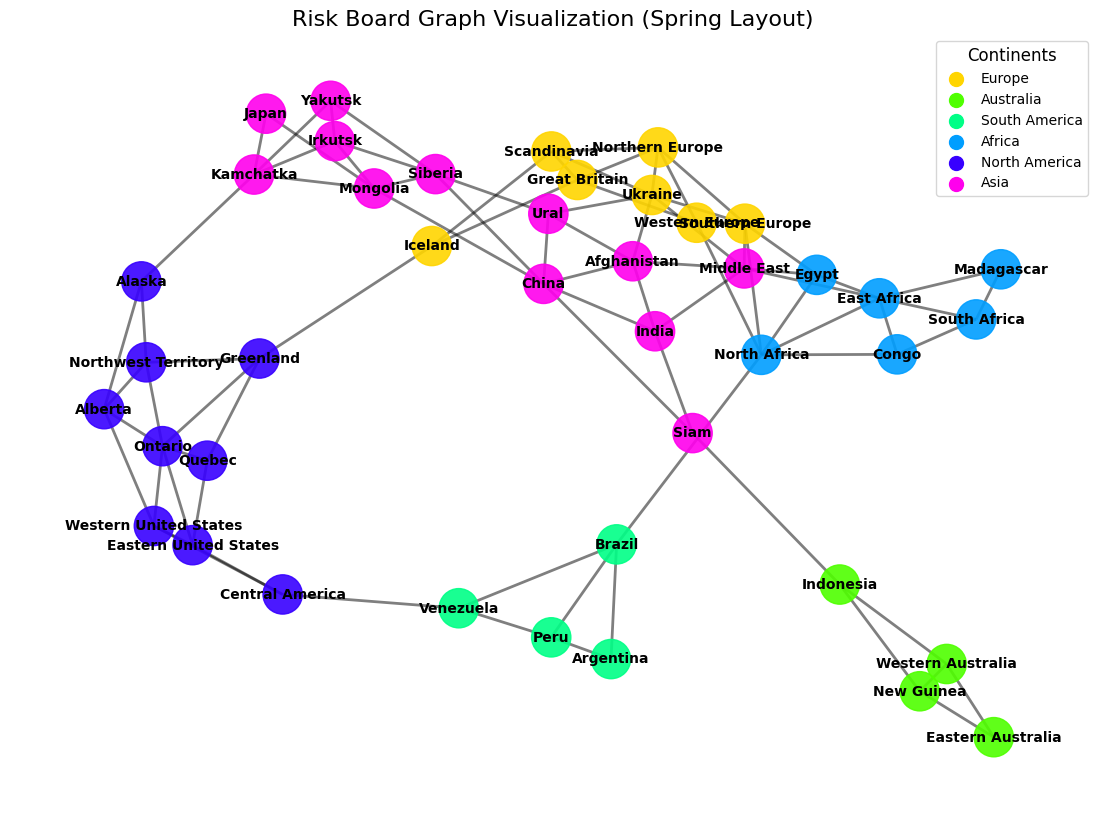

In [17]:
def visualize_risk_graph(G,layout_type='spring'):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Your code here
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout,
        'kamada_kawai': nx.kamada_kawai_layout
     }
    if layout_type not in layouts:
        raise ValueError(f"Invalid layout type '{layout_type}'. "
                         f"Choose from {list(layouts.keys())}.")

    # Determine positions for nodes based on the chosen layout
    pos = layouts[layout_type](G, seed=42) # seed for reproducibility
    
    # Extract continents for node coloring
    continents = set(nx.get_node_attributes(G, 'continent').values())
    
    # Generate distinct colors for continents
    palette = sns.color_palette('hsv', len(continents))
    continent_colors = dict(zip(continents, palette))

    # Assign colors to each node based on continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes()]

    plt.figure(figsize=(14, 10))

    # Draw the nodes with increased size
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors, alpha=0.9)

    # Draw edges between nodes
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)

    # Draw labels with increased font size
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Create a legend for continents
    for continent, color in continent_colors.items():
        plt.scatter([], [], c=[color], label=continent, s=100)

    plt.legend(title="Continents", fontsize=10, title_fontsize=12, loc='best')

    # Title and axis off for better aesthetics
    plt.title(f"Risk Board Graph Visualization ({layout_type.capitalize()} Layout)", fontsize=16)
    plt.axis('off')

    # Display the plot
    plt.show()
visualize_risk_graph(G, layout_type='spring')  

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎The Kamada-Kawai layout provides the best visualization for continent-based clustering because it positions nodes to minimize overall edge lengths, clearly grouping closely connected territories together, making continent structures visually intuitive. I chose this layout since it effectively demonstrates territorial connections and continent grouping, making the Risk board easier to interpret visually. The Kamada-Kawai layout uses a spring-force approach, modeling edges as springs and positioning nodes by minimizing the overall "energy" or tension within the graph, effectively visualizing graph structure (source: NetworkX documentation). Node colors are assigned based on continents using:
node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes()]

Here, each node receives a color by looking up its continent attribute in the predefined continent-color mapping. The legend was created by plotting dummy points with no data but with continent colors and labels using:
for continent, color in continent_colors.items():
    plt.scatter([], [], c=[color], label=continent, s=100)
This approach efficiently generates a legend linking colors to continents without needing actual data points. The colormap chosen was hsv, imported using Seaborn (sns.color_palette('hsv', len(continents))). Node size (node_size=800) and font size (font_size=10) were adjusted directly in the NetworkX drawing functions to enhance readability:

nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=10)

Labels for nodes were printed using nx.draw_networkx_labels(G, pos), which places the name of each territory directly on its respective node in the visualization.


---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [18]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University